# Color Filtering

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(584, 800, 3)


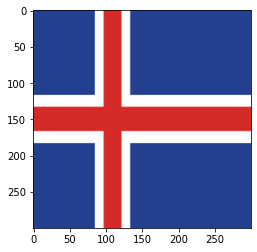

In [11]:
filter  = cv2.imread('flag.jpg')
print(filter.shape)

filter = cv2.resize(filter, (300,300))

# It converts the BGR color space of image to HSV color space 
hsv = cv2.cvtColor(filter, cv2.COLOR_BGR2HSV) 
    
# Threshold of blue in HSV space 
lower_blue = np.array([35, 140, 60])         # blue - lower = 35
upper_blue = np.array([255, 255, 180])      #  blue - upper = 255
 # preparing the mask to overlay 
mask = cv2.inRange(hsv, lower_blue, upper_blue) 
 
# The black region in the mask has the value of 0, 
# so when multiplied with original image removes all non-blue regions 
result = cv2.bitwise_and(filter, filter, mask = mask) 
# cv2_imshow(filter)
filter = cv2.cvtColor(filter, cv2.COLOR_BGR2RGB)
plt.imshow(filter)
plt.show()

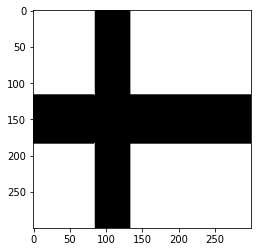

In [12]:
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask)
plt.show()

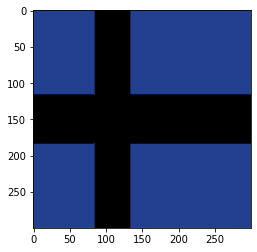

In [13]:
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)
plt.show() 

# Using Contours to Count Coins

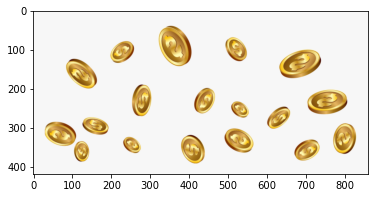

In [6]:
import cv2
img = cv2.imread('coins.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
# cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

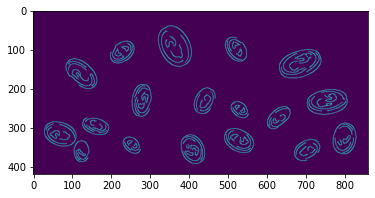

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # Converting Image to Grayscale
blurred = cv2.GaussianBlur(gray, (11, 11), 0)  #  Blurring the Image
edged = cv2.Canny(blurred, 30, 150)           #   Detecting Edges

# edged = cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
plt.imshow(edged)
plt.show()
# cv2_imshow(edged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

<h2>cv2.drawContours(img, contours, -1, (0, 0, 255), 3) <h2>

I found 68 coins in the image


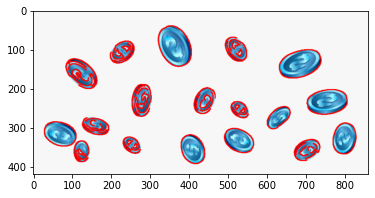

In [8]:
cnts, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# print(cnts)
print("I found {} coins in the image".format(len(cnts)))

coins = img.copy()
cv2.drawContours(coins, cnts, -1, (0, 0, 255), 2)

coins = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)
plt.imshow(coins)
plt.show()
# cv2_imshow(coins)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Project - Live Sketcher

In [9]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()                        # Reading the Frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)# Converting it to GrayScale
    blur = cv2.GaussianBlur(gray , (5,5), 0)     #  Blurring
    edge = cv2.Canny(blur, 70, 110)             #   Finding Edges
    ret, thresh = cv2.threshold(edge, 170, 255, cv2.THRESH_BINARY_INV)  # Thresholding
    cv2.imshow('sketch', thresh)
    cv2.waitKey(1)

    if cv2.waitKey(33) == 27:
        break;
cap.release()
cv2.destroyAllWindows()


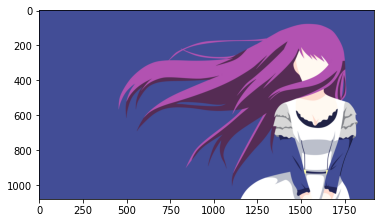

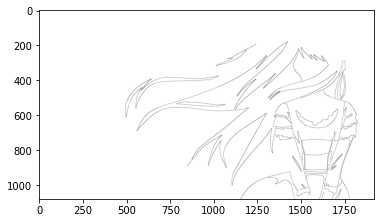

In [31]:
frame = cv2.imread('897525.png')
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
plt.show()
                      # Reading the Frame
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)# Converting it to GrayScale
blur = cv2.GaussianBlur(gray , (5,5), 0)     #  Blurring
edge = cv2.Canny(blur, 70, 110)             #   Finding Edges
ret, thresh = cv2.threshold(edge, 170, 255, cv2.THRESH_BINARY_INV)  # Thresholding

thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
plt.imshow(thresh)
plt.show()



In [45]:
cap.release()

# 5. Morphological Transformations

Dilation and Erosion are known as Morphological Operations.<br>
They are often performed on Binary Images, Similar to Contour Detection.<br>
Dilation enlarges bright, white pixels in an image by adding pixels to the perceived boundaries of objects in that image.<br>
Erosion does the opposite, it removes the pixels along object boundaries and shrink the size of object.<br>
<br>


To <b>Erode </b> an image we can use <b>cv2.erode(img, kernel, no of iterations)</b>

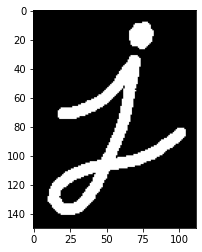

In [10]:
img = cv2.imread('j.png',0)
# cv2_imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


# cv2_imshow(erosion)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [49]:

kernel = np.ones((5,5),np.uint8)

print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


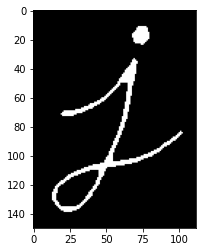

In [53]:
''' Performing Erosion '''
erosion = cv2.erode(img,kernel,iterations = 1)

erosion = cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB)
plt.imshow(erosion)
plt.show()

To <b>Dilate </b> an image we can use <b>cv2.dilate(img, kernel, no of iterations)</b>

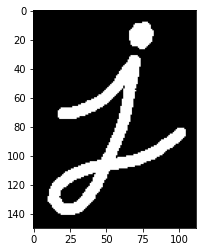

In [51]:
img = cv2.imread('j.png',0)
# cv2_imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()



[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


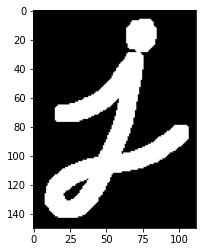

In [57]:
kernel = np.ones((5,5),np.uint8)
print(kernel)
''' Performing Dilation '''
dilation = cv2.dilate(img,kernel,iterations = 1)

dilation = cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB)
plt.imshow(dilation)
plt.show()
# cv2_imshow(dilation)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Opening - erosion followed by dilation

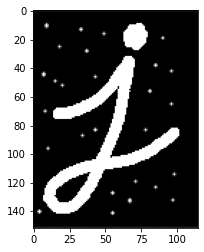

In [58]:
opening_img = cv2.imread('opening.png', 0)
# cv2_imshow(opening_img)
opening_img = cv2.cvtColor(opening_img, cv2.COLOR_BGR2RGB)
plt.imshow(opening_img)
plt.show()


# cv2_imshow(opening)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


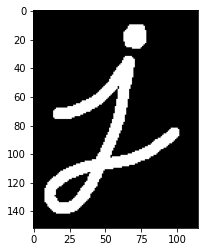

In [59]:
opening = cv2.morphologyEx(opening_img, cv2.MORPH_OPEN, kernel)


opening = cv2.cvtColor(opening, cv2.COLOR_BGR2RGB)
plt.imshow(opening)
plt.show()

# Closing- dilation followed by erosion

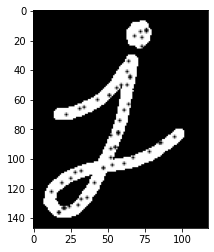

In [60]:
closing_img = cv2.imread('closing.png', 0)
# cv2_imshow(closing_img)
closing_img = cv2.cvtColor(closing_img, cv2.COLOR_BGR2RGB)
plt.imshow(closing_img)
plt.show()



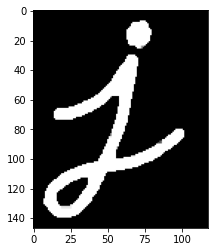

In [61]:
closing = cv2.morphologyEx(closing_img, cv2.MORPH_CLOSE, kernel)

closing = cv2.cvtColor(closing, cv2.COLOR_BGR2RGB)
plt.imshow(closing)
plt.show()
# cv2_imshow(closing)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Image Inpainting
### What is Image Inpainting?
Image inpainting is a class of algorithms in computer vision where
the objective is to fill regions inside an image or a video.
The region is identified using a binary mask, and the filling is usually
done by propagating information from the boundary of the region that
needs to be filled.
The most common application of image inpainting is restoration of old
scanned photos. It is also used for removing small unwanted objects
in an image.

## Inpainting Algorithms
### INPAINT_NS : Navier-Stokes based Inpainting
### INPAINT_TELEA : Fast Marching Method based<br>
<br>


## Difference
As per the theory and the papers, Navier-Stokes based inpainting
is supposed to be slower<br> and has a tendency to produce results that
are blurrier than the Fast Marching based method.

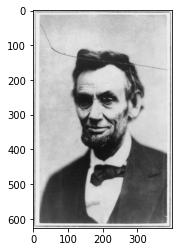

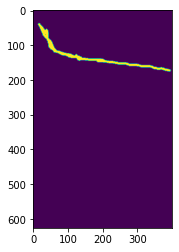

In [62]:
img = cv2.imread('l.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

mask = cv2.imread('mask.png', 0) 
# cv2_imshow(mask)
# closing = cv2.cvtColor(closing, cv2.COLOR_BGR2RGB)
plt.imshow(mask)
plt.show()


In [63]:
# Performing Inpainting
ns = cv2.inpaint(img, mask, 1, cv2.INPAINT_NS) 
telea = cv2.inpaint(img, mask, 1, cv2.INPAINT_TELEA)

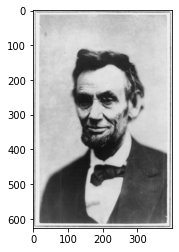

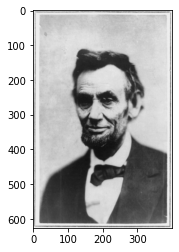

In [64]:
# Displaying Results
# cv2_imshow(ns)
# cv2_imshow(telea)
ns = cv2.cvtColor(ns, cv2.COLOR_BGR2RGB)
plt.imshow(ns)
plt.show()


telea = cv2.cvtColor(telea, cv2.COLOR_BGR2RGB)
plt.imshow(telea)
plt.show()

In [70]:
img = cv2.imread('a.png') 
cv2.imshow('dfdf',img)
mask = cv2.imread('a_m.png', 0) 
cv2.imshow('sds',mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [74]:
# Performing Inpainting
ns = cv2.inpaint(img, mask, 1, cv2.INPAINT_NS) 
# telea = cv2.inpaint(img, mask, 1, cv2.INPAINT_TELEA)

In [75]:
# Displaying Results
cv2.imshow('nsq',ns)
cv2.waitKey(0)
cv2.destroyAllWindows()
# cv2_imshow(telea)